# My Clash Royale battles' EDA

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import operator
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('8V280L8VQ-clash-royale-da.csv', sep=',')

In [3]:
# Reversing dataframe order

df = df.sort_index(axis=0, ascending=False)
fixed_index = list(df.index)
fixed_index.sort()
df = df.set_index([fixed_index])

# Cleaning data
df['my_result'] = df['my_result'].apply(lambda x: x.strip())

In [4]:
def arena(trophies):
    if trophies < 400:
        return '1'
    elif trophies < 800:
        return '2'
    elif trophies < 1100:
        return '3'
    elif trophies < 1400:
        return '4'
    elif trophies < 1700:
        return '5'
    elif trophies < 2000:
        return '6'
    elif trophies < 2300:
        return '7'
    elif trophies < 2600:
        return '8'
    elif trophies < 3000:
        return '9'
    elif trophies < 3400:
        return '10'
    elif trophies < 3800:
        return '11'
    else: 
        return '12'

In [5]:
df['arena'] = df['my_trophies'].apply(lambda row: arena(row))

In [6]:
pd.set_option('display.max_columns', None)  
df.head()

,my_result,my_score,points,opponent_score,my_trophies,opponent_trophies,i_have_clan,opponent_has_clan,match_type,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Goblins,op_Tombstone,op_Witch,op_Sparky,op_Bowler,op_Zap,op_Skeleton_Barrel,op_Fireball,op_Valkyrie,op_Ice_Wizard,op_Mini_P.E.K.K.A,op_P.E.K.K.A,op_Tornado,op_Dark_Prince,op_X-Bow,op_Bats,op_Rage,op_Elixir_Collector,op_Rocket,op_Royal_Giant,op_Miner,op_Wizard,op_Ice_Golem,op_Furnace,op_Executioner,op_Flying_Machine,op_Inferno_Dragon,op_Bomber,op_Clone,op_Golem,op_Lava_Hound,op_Poison,op_Archers,op_Fire_Spirits,op_Lightning,op_Royal_Ghost,op_Mega_Knight,op_Guards,op_Three_Musketeers,op_Inferno_Tower,op_Bomb_Tower,op_Elite_Barbarians,op_Tesla,op_Mega_Minion,op_Ice_Spirit,op_Goblin_Hut,op_Dart_Goblin,op_Minions,op_Graveyard,op_Spear_Goblins,op_Battle_Ram,op_Hunter,op_Baby_Dragon,op_The_Log,op_Giant_Skeleton,op_Freeze,op_Barbarians,op_Balloon,op_Goblin_Barrel,op_Lumberjack,op_Cannon,op_Musketeer,op_Hog_Rider,op_Mirror,op_Electro_Wizard,op_Minion_Horde,op_Arrows,op_Bandit,op_Skeleton_Army,op_Goblin_Gang,op_Night_Witch,op_Prince,op_Knight,op_Mortar,op_Giant,op_Skeletons,op_Barbarian_Hut,op_Princess,my_Witch,my_Skeleton_Barrel,my_Baby_Dragon,my_Goblin_Gang,my_Prince,my_Zap,my_Valkyrie,my_Knight,my_Giant,my_Dart_Goblin,my_Rage,my_Ice_Spirit,my_Wizard,my_Cannon,my_Fireball,my_Mortar,my_Fire_Spirits,my_Bats,my_Royal_Giant,my_Bomber,my_Arrows,my_Spear_Goblins,my_Minions,my_Rocket,my_Mega_Knight,my_Goblin_Barrel,my_Tornado,my_Elite_Barbarians,my_Goblins,my_Balloon,my_Hog_Rider,my_Archers,my_Skeleton_Army,my_Mini_P.E.K.K.A,my_Musketeer,my_Furnace,my_Inferno_Tower,arena
0,Defeat,1,0,3,0,0,n,n,replay__ladderBattleType,3.625,3.750,6,0,2,7,0,1,4,4,0,0,3,4,1,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1
1,Victory,3,-30,0,0,0,n,n,replay__ladderBattleType,3.500,3.500,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1
2,Victory,3,30,0,60,30,n,n,replay__ladderBattleType,3.500,4.250,5,0,3,4,1,3,3,3,2,0,2,4,2,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1
3,Defeat,1,-1,3,59,90,n,y,replay__ladderBattleType,3.500,3.750,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1
4,Defeat,1,-1,3,58,89,n,n,replay__ladderBattleType,3.250,3.625,5,0,3,6,0,2,4,3,1,0,4,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,1


In [7]:
df['my_trophies'].mean()

1895.6875

# Trophies over time (battles)

# Difference of trophies between me and my opponents

In [8]:
df_diff_troph = df[['my_trophies', 'opponent_trophies']]
df_diff_troph

df_diff_troph = df_diff_troph.assign(troph_diff = df.my_trophies - df.opponent_trophies)
df_diff_troph.head()

,my_trophies,opponent_trophies,troph_diff
0,0,0,0
1,0,0,0
2,60,30,30
3,59,90,-31
4,58,89,-31


In [9]:
df_diff_troph['troph_diff'].describe()

count    688.000000
mean       0.267442
std       51.295371
min      -86.000000
25%      -51.000000
50%        0.000000
75%       50.000000
max       88.000000
Name: troph_diff, dtype: float64

Trophies difference over time (battles, window = 5)

In [10]:
df_diff_troph['troph_diff'].rolling(window = 5).mean().head()

0    NaN
1    NaN
2    NaN
3    NaN
4   -6.4
Name: troph_diff, dtype: float64

Number of battles I had more trophies than my opponent

In [11]:
df_diff_troph[df_diff_troph.troph_diff > 0]['troph_diff'].describe()

count    343.000000
mean      48.463557
std       16.060312
min        1.000000
25%       40.000000
50%       50.000000
75%       58.000000
max       88.000000
Name: troph_diff, dtype: float64

Number of battles I had less trophies than my opponent

In [12]:
df_diff_troph[df_diff_troph.troph_diff < 0]['troph_diff'].describe()

count    338.000000
mean     -48.636095
std       18.419948
min      -86.000000
25%      -61.000000
50%      -51.000000
75%      -40.000000
max       -1.000000
Name: troph_diff, dtype: float64

Number of battles me and the opponent had the same trophies

In [13]:
df_diff_troph[df_diff_troph.troph_diff == 0]['troph_diff'].describe()

count    7.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: troph_diff, dtype: float64

# Correlation between difference of trophies and crows won in each battle

,troph_diff,points
troph_diff,1.000000,0.931654
points,0.931654,1.000000


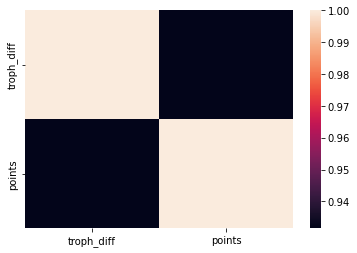

In [14]:
df['troph_diff'] = df_diff_troph['troph_diff']

corr = df[['troph_diff', 'points']].corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

corr

# Battles' result count based on diff of trophies# Battles' result count based on diff of trophies

When I have more or the same number of trophies than my opponent

In [15]:
df[['troph_diff', 'my_result']][df.troph_diff >= 0].groupby(['my_result']).count()

,troph_diff
my_result,
Defeat,1
Draw,23
Victory,326


When I have less trophies than my opponent

In [16]:
df[['troph_diff', 'my_result']][df.troph_diff < 0].groupby(['my_result']).count()

,troph_diff
my_result,
Defeat,310
Draw,28


# Finding more linear correlations

In [17]:
def corrs(df, columns_list, plot_size=(50, 50), font_scale = 1.5):
    if columns_list == 0:
        corrs = df.corr().round(2)        
    else:
        corrs = df[columns_list].corr().round(2)
        
    mask = np.zeros_like(corrs)
    mask[np.triu_indices_from(mask, k = 0)] = True        

    sns.set(rc={'figure.figsize': plot_size})

    sns.set(font_scale=font_scale)

    sns.heatmap(corrs, xticklabels=corrs.columns.values, yticklabels=corrs.columns.values, 
                annot=True, mask=mask)
    
    plt.show()  

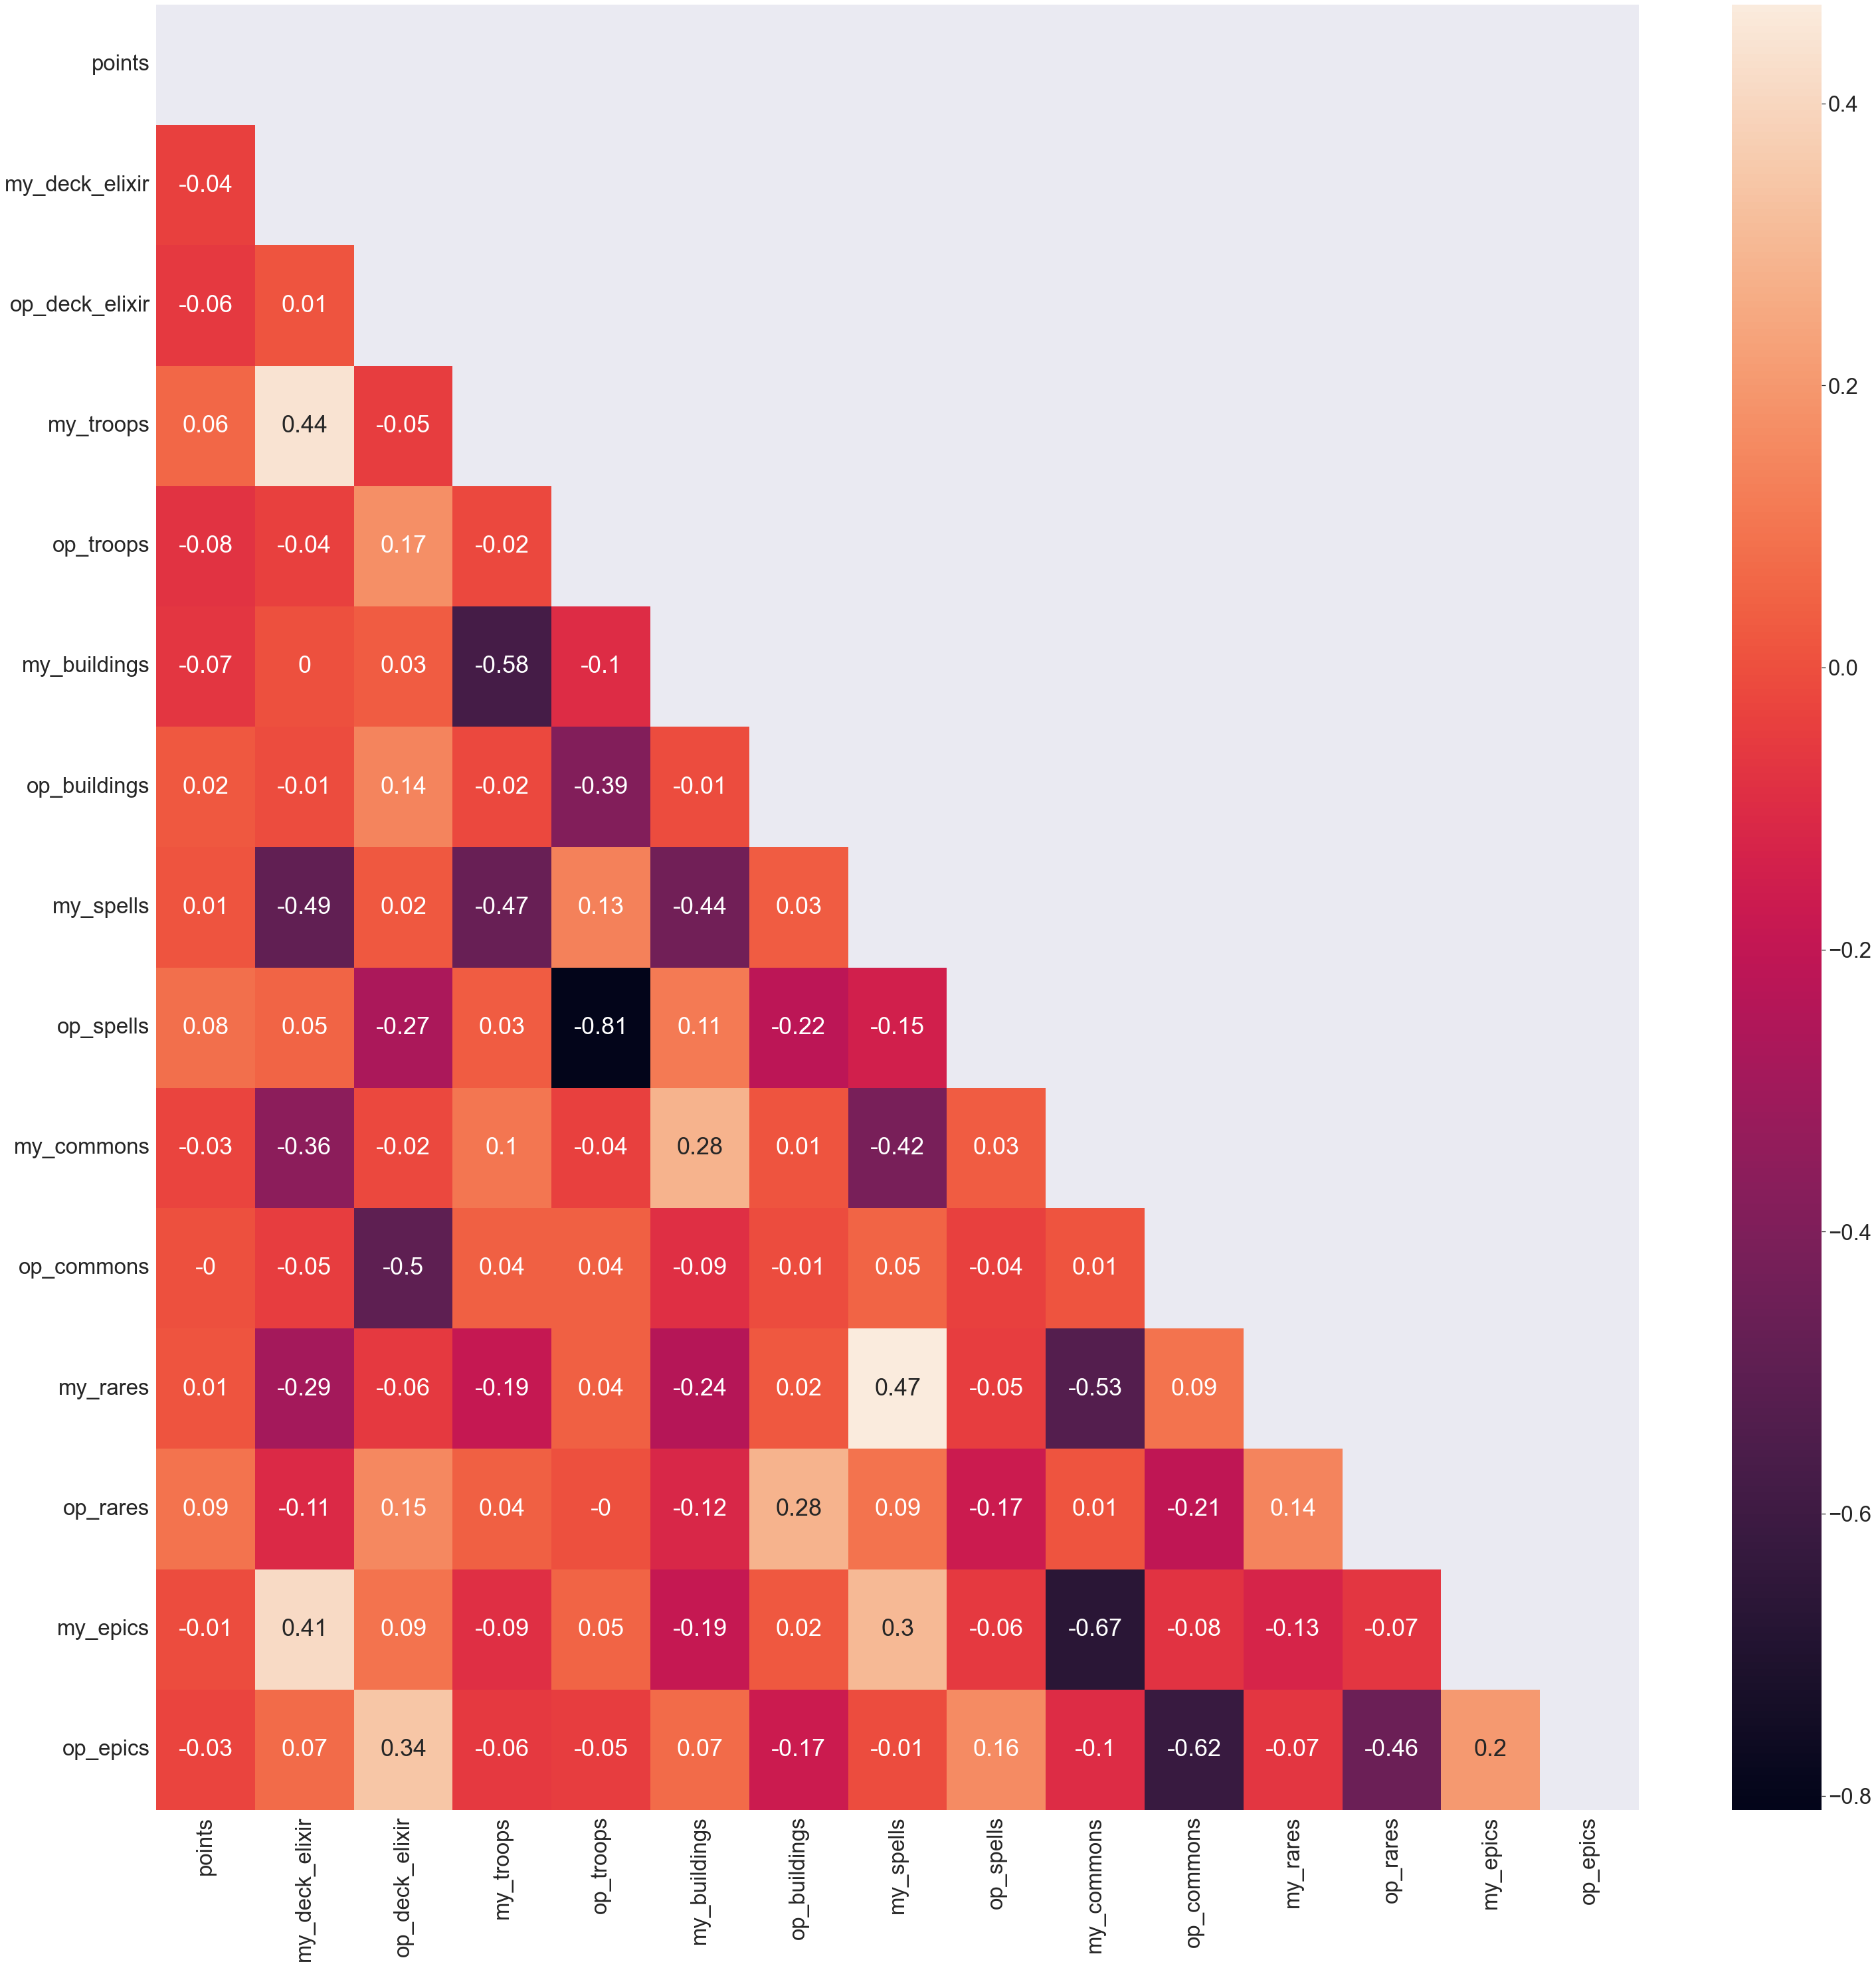

In [18]:
corrs(df, ['points', 'my_deck_elixir', 'op_deck_elixir', 'my_troops', 'op_troops', 
           'my_buildings', 'op_buildings', 'my_spells', 'op_spells', 
           'my_commons', 'op_commons', 'my_rares', 'op_rares', 'my_epics', 'op_epics'], 
      font_scale = 3)

# Cards mean lvl diff by battle result

<AxesSubplot:xlabel='my_result', ylabel='cards_lvl_mean_diff'>

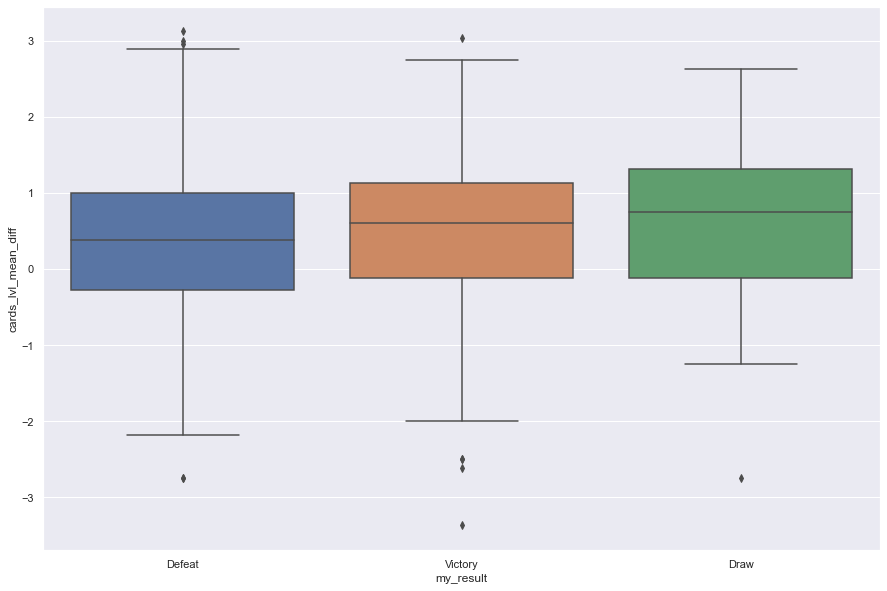

In [20]:
df_aux = df.filter(regex=('my_[A-Z]|op_[A-Z]'))

lvl_diff = []

for row in df_aux.itertuples(index=False):  
    my_lvls = []
    op_lvls = []
    
    for col in row._fields:        
        if not col.startswith('_'):
            if getattr(row, col) > 0:
                if re.match('my_[A-Z]', col):
                    my_lvls.append(getattr(row, col))
                else:
                    op_lvls.append(getattr(row, col))
    
    lvl_diff.append(np.mean(my_lvls) - np.mean(op_lvls))
    
df['cards_lvl_mean_diff'] = lvl_diff


sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(x=df['my_result'], y=df['cards_lvl_mean_diff'])

# Opponents' elixir

In [21]:
df['op_deck_elixir'].describe()

count    688.000000
mean       3.972202
std        0.470108
min        2.125000
25%        3.625000
50%        4.000000
75%        4.250000
max        5.750000
Name: op_deck_elixir, dtype: float64

# Opponents' elixir based on my battle result

In [22]:
df[df.my_result == 'Victory']['op_deck_elixir'].describe()

count    326.000000
mean       3.950153
std        0.488825
min        2.125000
25%        3.625000
50%        4.000000
75%        4.250000
max        5.375000
Name: op_deck_elixir, dtype: float64

In [23]:
df[df.my_result == 'Defeat']['op_deck_elixir'].describe()

count    311.000000
mean       4.020900
std        0.452775
min        2.750000
25%        3.750000
50%        4.000000
75%        4.312500
max        5.750000
Name: op_deck_elixir, dtype: float64

<AxesSubplot:xlabel='my_result', ylabel='op_deck_elixir'>

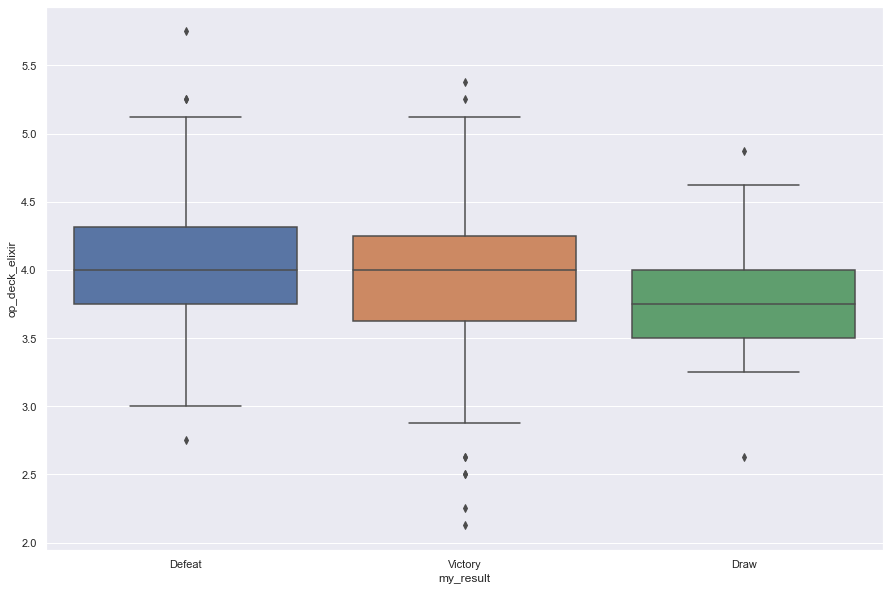

In [24]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(x=df['my_result'], y=df['op_deck_elixir'])

#Data Analysis 

In [25]:
df['match_type'].unique()

array(['replay__ladderBattleType'], dtype=object)

In [26]:
df.drop(columns=['i_have_clan','opponent_has_clan','match_type'], 
        axis=1, 
        inplace=True)

In [27]:
df['my_result'].unique()

array(['Defeat', 'Victory', 'Draw'], dtype=object)

In [28]:
df.drop(df.loc[df['my_result']=='Victory '].index, inplace=True)

In [29]:
df['my_result'].unique()

array(['Defeat', 'Victory', 'Draw'], dtype=object)

In [30]:
df.dropna()

,my_result,my_score,points,opponent_score,my_trophies,opponent_trophies,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Goblins,op_Tombstone,op_Witch,op_Sparky,op_Bowler,op_Zap,op_Skeleton_Barrel,op_Fireball,op_Valkyrie,op_Ice_Wizard,op_Mini_P.E.K.K.A,op_P.E.K.K.A,op_Tornado,op_Dark_Prince,op_X-Bow,op_Bats,op_Rage,op_Elixir_Collector,op_Rocket,op_Royal_Giant,op_Miner,op_Wizard,op_Ice_Golem,op_Furnace,op_Executioner,op_Flying_Machine,op_Inferno_Dragon,op_Bomber,op_Clone,op_Golem,op_Lava_Hound,op_Poison,op_Archers,op_Fire_Spirits,op_Lightning,op_Royal_Ghost,op_Mega_Knight,op_Guards,op_Three_Musketeers,op_Inferno_Tower,op_Bomb_Tower,op_Elite_Barbarians,op_Tesla,op_Mega_Minion,op_Ice_Spirit,op_Goblin_Hut,op_Dart_Goblin,op_Minions,op_Graveyard,op_Spear_Goblins,op_Battle_Ram,op_Hunter,op_Baby_Dragon,op_The_Log,op_Giant_Skeleton,op_Freeze,op_Barbarians,op_Balloon,op_Goblin_Barrel,op_Lumberjack,op_Cannon,op_Musketeer,op_Hog_Rider,op_Mirror,op_Electro_Wizard,op_Minion_Horde,op_Arrows,op_Bandit,op_Skeleton_Army,op_Goblin_Gang,op_Night_Witch,op_Prince,op_Knight,op_Mortar,op_Giant,op_Skeletons,op_Barbarian_Hut,op_Princess,my_Witch,my_Skeleton_Barrel,my_Baby_Dragon,my_Goblin_Gang,my_Prince,my_Zap,my_Valkyrie,my_Knight,my_Giant,my_Dart_Goblin,my_Rage,my_Ice_Spirit,my_Wizard,my_Cannon,my_Fireball,my_Mortar,my_Fire_Spirits,my_Bats,my_Royal_Giant,my_Bomber,my_Arrows,my_Spear_Goblins,my_Minions,my_Rocket,my_Mega_Knight,my_Goblin_Barrel,my_Tornado,my_Elite_Barbarians,my_Goblins,my_Balloon,my_Hog_Rider,my_Archers,my_Skeleton_Army,my_Mini_P.E.K.K.A,my_Musketeer,my_Furnace,my_Inferno_Tower,arena,troph_diff,cards_lvl_mean_diff
0,Defeat,1,0,3,0,0,3.625,3.750,6,0,2,7,0,1,4,4,0,0,3,4,1,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1,0,0.125000
1,Victory,3,-30,0,0,0,3.500,3.500,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,0,-0.125000
2,Victory,3,30,0,60,30,3.500,4.250,5,0,3,4,1,3,3,3,2,0,2,4,2,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,30,-0.750000
3,Defeat,1,-1,3,59,90,3.500,3.750,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,-31,-0.250000
4,Defeat,1,-1,3,58,89,3.250,3.625,5,0,3,6,0,2,4,3,1,0,4,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,1,-31,0.339286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Defeat,0,-26,2,2771,2820,3.625,3.750,5,1,2,6,0,2,4,1,2,1,1,3,4,0,0,0,0,0,0,9,0,0,6,0,6,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0

In [31]:
df[df.isnull().any(axis=1)]

,my_result,my_score,points,opponent_score,my_trophies,opponent_trophies,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Goblins,op_Tombstone,op_Witch,op_Sparky,op_Bowler,op_Zap,op_Skeleton_Barrel,op_Fireball,op_Valkyrie,op_Ice_Wizard,op_Mini_P.E.K.K.A,op_P.E.K.K.A,op_Tornado,op_Dark_Prince,op_X-Bow,op_Bats,op_Rage,op_Elixir_Collector,op_Rocket,op_Royal_Giant,op_Miner,op_Wizard,op_Ice_Golem,op_Furnace,op_Executioner,op_Flying_Machine,op_Inferno_Dragon,op_Bomber,op_Clone,op_Golem,op_Lava_Hound,op_Poison,op_Archers,op_Fire_Spirits,op_Lightning,op_Royal_Ghost,op_Mega_Knight,op_Guards,op_Three_Musketeers,op_Inferno_Tower,op_Bomb_Tower,op_Elite_Barbarians,op_Tesla,op_Mega_Minion,op_Ice_Spirit,op_Goblin_Hut,op_Dart_Goblin,op_Minions,op_Graveyard,op_Spear_Goblins,op_Battle_Ram,op_Hunter,op_Baby_Dragon,op_The_Log,op_Giant_Skeleton,op_Freeze,op_Barbarians,op_Balloon,op_Goblin_Barrel,op_Lumberjack,op_Cannon,op_Musketeer,op_Hog_Rider,op_Mirror,op_Electro_Wizard,op_Minion_Horde,op_Arrows,op_Bandit,op_Skeleton_Army,op_Goblin_Gang,op_Night_Witch,op_Prince,op_Knight,op_Mortar,op_Giant,op_Skeletons,op_Barbarian_Hut,op_Princess,my_Witch,my_Skeleton_Barrel,my_Baby_Dragon,my_Goblin_Gang,my_Prince,my_Zap,my_Valkyrie,my_Knight,my_Giant,my_Dart_Goblin,my_Rage,my_Ice_Spirit,my_Wizard,my_Cannon,my_Fireball,my_Mortar,my_Fire_Spirits,my_Bats,my_Royal_Giant,my_Bomber,my_Arrows,my_Spear_Goblins,my_Minions,my_Rocket,my_Mega_Knight,my_Goblin_Barrel,my_Tornado,my_Elite_Barbarians,my_Goblins,my_Balloon,my_Hog_Rider,my_Archers,my_Skeleton_Army,my_Mini_P.E.K.K.A,my_Musketeer,my_Furnace,my_Inferno_Tower,arena,troph_diff,cards_lvl_mean_diff


In [32]:
df["my_result"].value_counts()

Victory    326
Defeat     311
Draw        51
Name: my_result, dtype: int64

In [33]:
df["my_result"] = df["my_result"].astype('category')
df["result"] = df["my_result"].cat.codes
df.head()

,my_result,my_score,points,opponent_score,my_trophies,opponent_trophies,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Goblins,op_Tombstone,op_Witch,op_Sparky,op_Bowler,op_Zap,op_Skeleton_Barrel,op_Fireball,op_Valkyrie,op_Ice_Wizard,op_Mini_P.E.K.K.A,op_P.E.K.K.A,op_Tornado,op_Dark_Prince,op_X-Bow,op_Bats,op_Rage,op_Elixir_Collector,op_Rocket,op_Royal_Giant,op_Miner,op_Wizard,op_Ice_Golem,op_Furnace,op_Executioner,op_Flying_Machine,op_Inferno_Dragon,op_Bomber,op_Clone,op_Golem,op_Lava_Hound,op_Poison,op_Archers,op_Fire_Spirits,op_Lightning,op_Royal_Ghost,op_Mega_Knight,op_Guards,op_Three_Musketeers,op_Inferno_Tower,op_Bomb_Tower,op_Elite_Barbarians,op_Tesla,op_Mega_Minion,op_Ice_Spirit,op_Goblin_Hut,op_Dart_Goblin,op_Minions,op_Graveyard,op_Spear_Goblins,op_Battle_Ram,op_Hunter,op_Baby_Dragon,op_The_Log,op_Giant_Skeleton,op_Freeze,op_Barbarians,op_Balloon,op_Goblin_Barrel,op_Lumberjack,op_Cannon,op_Musketeer,op_Hog_Rider,op_Mirror,op_Electro_Wizard,op_Minion_Horde,op_Arrows,op_Bandit,op_Skeleton_Army,op_Goblin_Gang,op_Night_Witch,op_Prince,op_Knight,op_Mortar,op_Giant,op_Skeletons,op_Barbarian_Hut,op_Princess,my_Witch,my_Skeleton_Barrel,my_Baby_Dragon,my_Goblin_Gang,my_Prince,my_Zap,my_Valkyrie,my_Knight,my_Giant,my_Dart_Goblin,my_Rage,my_Ice_Spirit,my_Wizard,my_Cannon,my_Fireball,my_Mortar,my_Fire_Spirits,my_Bats,my_Royal_Giant,my_Bomber,my_Arrows,my_Spear_Goblins,my_Minions,my_Rocket,my_Mega_Knight,my_Goblin_Barrel,my_Tornado,my_Elite_Barbarians,my_Goblins,my_Balloon,my_Hog_Rider,my_Archers,my_Skeleton_Army,my_Mini_P.E.K.K.A,my_Musketeer,my_Furnace,my_Inferno_Tower,arena,troph_diff,cards_lvl_mean_diff,result
0,Defeat,1,0,3,0,0,3.625,3.750,6,0,2,7,0,1,4,4,0,0,3,4,1,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1,0,0.125000,0
1,Victory,3,-30,0,0,0,3.500,3.500,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,0,-0.125000,2
2,Victory,3,30,0,60,30,3.500,4.250,5,0,3,4,1,3,3,3,2,0,2,4,2,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,30,-0.750000,2
3,Defeat,1,-1,3,59,90,3.500,3.750,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,-31,-0.250000,0
4,Defeat,1,-1,3,58,89,3.250,3.625,5,0,3,6,0,2,4,3,1,0,4,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,1,-31,0.339286,0


In [34]:
df["result"].value_counts()

2    326
0    311
1     51
Name: result, dtype: int64

In [35]:
df.drop(columns=['my_result'])
df.head()

,my_result,my_score,points,opponent_score,my_trophies,opponent_trophies,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Goblins,op_Tombstone,op_Witch,op_Sparky,op_Bowler,op_Zap,op_Skeleton_Barrel,op_Fireball,op_Valkyrie,op_Ice_Wizard,op_Mini_P.E.K.K.A,op_P.E.K.K.A,op_Tornado,op_Dark_Prince,op_X-Bow,op_Bats,op_Rage,op_Elixir_Collector,op_Rocket,op_Royal_Giant,op_Miner,op_Wizard,op_Ice_Golem,op_Furnace,op_Executioner,op_Flying_Machine,op_Inferno_Dragon,op_Bomber,op_Clone,op_Golem,op_Lava_Hound,op_Poison,op_Archers,op_Fire_Spirits,op_Lightning,op_Royal_Ghost,op_Mega_Knight,op_Guards,op_Three_Musketeers,op_Inferno_Tower,op_Bomb_Tower,op_Elite_Barbarians,op_Tesla,op_Mega_Minion,op_Ice_Spirit,op_Goblin_Hut,op_Dart_Goblin,op_Minions,op_Graveyard,op_Spear_Goblins,op_Battle_Ram,op_Hunter,op_Baby_Dragon,op_The_Log,op_Giant_Skeleton,op_Freeze,op_Barbarians,op_Balloon,op_Goblin_Barrel,op_Lumberjack,op_Cannon,op_Musketeer,op_Hog_Rider,op_Mirror,op_Electro_Wizard,op_Minion_Horde,op_Arrows,op_Bandit,op_Skeleton_Army,op_Goblin_Gang,op_Night_Witch,op_Prince,op_Knight,op_Mortar,op_Giant,op_Skeletons,op_Barbarian_Hut,op_Princess,my_Witch,my_Skeleton_Barrel,my_Baby_Dragon,my_Goblin_Gang,my_Prince,my_Zap,my_Valkyrie,my_Knight,my_Giant,my_Dart_Goblin,my_Rage,my_Ice_Spirit,my_Wizard,my_Cannon,my_Fireball,my_Mortar,my_Fire_Spirits,my_Bats,my_Royal_Giant,my_Bomber,my_Arrows,my_Spear_Goblins,my_Minions,my_Rocket,my_Mega_Knight,my_Goblin_Barrel,my_Tornado,my_Elite_Barbarians,my_Goblins,my_Balloon,my_Hog_Rider,my_Archers,my_Skeleton_Army,my_Mini_P.E.K.K.A,my_Musketeer,my_Furnace,my_Inferno_Tower,arena,troph_diff,cards_lvl_mean_diff,result
0,Defeat,1,0,3,0,0,3.625,3.750,6,0,2,7,0,1,4,4,0,0,3,4,1,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1,0,0.125000,0
1,Victory,3,-30,0,0,0,3.500,3.500,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,0,-0.125000,2
2,Victory,3,30,0,60,30,3.500,4.250,5,0,3,4,1,3,3,3,2,0,2,4,2,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,30,-0.750000,2
3,Defeat,1,-1,3,59,90,3.500,3.750,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,-31,-0.250000,0
4,Defeat,1,-1,3,58,89,3.250,3.625,5,0,3,6,0,2,4,3,1,0,4,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,1,-31,0.339286,0


In [36]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
df.head()

,my_score,points,opponent_score,my_trophies,opponent_trophies,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Goblins,op_Tombstone,op_Witch,op_Sparky,op_Bowler,op_Zap,op_Skeleton_Barrel,op_Fireball,op_Valkyrie,op_Ice_Wizard,op_Mini_P.E.K.K.A,op_P.E.K.K.A,op_Tornado,op_Dark_Prince,op_X-Bow,op_Bats,op_Rage,op_Elixir_Collector,op_Rocket,op_Royal_Giant,op_Miner,op_Wizard,op_Ice_Golem,op_Furnace,op_Executioner,op_Flying_Machine,op_Inferno_Dragon,op_Bomber,op_Clone,op_Golem,op_Lava_Hound,op_Poison,op_Archers,op_Fire_Spirits,op_Lightning,op_Royal_Ghost,op_Mega_Knight,op_Guards,op_Three_Musketeers,op_Inferno_Tower,op_Bomb_Tower,op_Elite_Barbarians,op_Tesla,op_Mega_Minion,op_Ice_Spirit,op_Goblin_Hut,op_Dart_Goblin,op_Minions,op_Graveyard,op_Spear_Goblins,op_Battle_Ram,op_Hunter,op_Baby_Dragon,op_The_Log,op_Giant_Skeleton,op_Freeze,op_Barbarians,op_Balloon,op_Goblin_Barrel,op_Lumberjack,op_Cannon,op_Musketeer,op_Hog_Rider,op_Mirror,op_Electro_Wizard,op_Minion_Horde,op_Arrows,op_Bandit,op_Skeleton_Army,op_Goblin_Gang,op_Night_Witch,op_Prince,op_Knight,op_Mortar,op_Giant,op_Skeletons,op_Barbarian_Hut,op_Princess,my_Witch,my_Skeleton_Barrel,my_Baby_Dragon,my_Goblin_Gang,my_Prince,my_Zap,my_Valkyrie,my_Knight,my_Giant,my_Dart_Goblin,my_Rage,my_Ice_Spirit,my_Wizard,my_Cannon,my_Fireball,my_Mortar,my_Fire_Spirits,my_Bats,my_Royal_Giant,my_Bomber,my_Arrows,my_Spear_Goblins,my_Minions,my_Rocket,my_Mega_Knight,my_Goblin_Barrel,my_Tornado,my_Elite_Barbarians,my_Goblins,my_Balloon,my_Hog_Rider,my_Archers,my_Skeleton_Army,my_Mini_P.E.K.K.A,my_Musketeer,my_Furnace,my_Inferno_Tower,arena,troph_diff,cards_lvl_mean_diff,result
0,1,0,3,0,0,3.625,3.750,6,0,2,7,0,1,4,4,0,0,3,4,1,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1,0,0.125000,0
1,3,-30,0,0,0,3.500,3.500,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,0,-0.125000,2
2,3,30,0,60,30,3.500,4.250,5,0,3,4,1,3,3,3,2,0,2,4,2,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,30,-0.750000,2
3,1,-1,3,59,90,3.500,3.750,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,-31,-0.250000,0
4,1,-1,3,58,89,3.250,3.625,5,0,3,6,0,2,4,3,1,0,4,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,1,-31,0.339286,0


In [37]:
df1=df.copy()
y=df['result']
df.drop(columns='result', 
        axis=1, 
        inplace=True)
df.head()
X= df
X.head()

,my_score,points,opponent_score,my_trophies,opponent_trophies,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Goblins,op_Tombstone,op_Witch,op_Sparky,op_Bowler,op_Zap,op_Skeleton_Barrel,op_Fireball,op_Valkyrie,op_Ice_Wizard,op_Mini_P.E.K.K.A,op_P.E.K.K.A,op_Tornado,op_Dark_Prince,op_X-Bow,op_Bats,op_Rage,op_Elixir_Collector,op_Rocket,op_Royal_Giant,op_Miner,op_Wizard,op_Ice_Golem,op_Furnace,op_Executioner,op_Flying_Machine,op_Inferno_Dragon,op_Bomber,op_Clone,op_Golem,op_Lava_Hound,op_Poison,op_Archers,op_Fire_Spirits,op_Lightning,op_Royal_Ghost,op_Mega_Knight,op_Guards,op_Three_Musketeers,op_Inferno_Tower,op_Bomb_Tower,op_Elite_Barbarians,op_Tesla,op_Mega_Minion,op_Ice_Spirit,op_Goblin_Hut,op_Dart_Goblin,op_Minions,op_Graveyard,op_Spear_Goblins,op_Battle_Ram,op_Hunter,op_Baby_Dragon,op_The_Log,op_Giant_Skeleton,op_Freeze,op_Barbarians,op_Balloon,op_Goblin_Barrel,op_Lumberjack,op_Cannon,op_Musketeer,op_Hog_Rider,op_Mirror,op_Electro_Wizard,op_Minion_Horde,op_Arrows,op_Bandit,op_Skeleton_Army,op_Goblin_Gang,op_Night_Witch,op_Prince,op_Knight,op_Mortar,op_Giant,op_Skeletons,op_Barbarian_Hut,op_Princess,my_Witch,my_Skeleton_Barrel,my_Baby_Dragon,my_Goblin_Gang,my_Prince,my_Zap,my_Valkyrie,my_Knight,my_Giant,my_Dart_Goblin,my_Rage,my_Ice_Spirit,my_Wizard,my_Cannon,my_Fireball,my_Mortar,my_Fire_Spirits,my_Bats,my_Royal_Giant,my_Bomber,my_Arrows,my_Spear_Goblins,my_Minions,my_Rocket,my_Mega_Knight,my_Goblin_Barrel,my_Tornado,my_Elite_Barbarians,my_Goblins,my_Balloon,my_Hog_Rider,my_Archers,my_Skeleton_Army,my_Mini_P.E.K.K.A,my_Musketeer,my_Furnace,my_Inferno_Tower,arena,troph_diff,cards_lvl_mean_diff
0,1,0,3,0,0,3.625,3.750,6,0,2,7,0,1,4,4,0,0,3,4,1,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,2,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1,0,0.125000
1,3,-30,0,0,0,3.500,3.500,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,0,-0.125000
2,3,30,0,60,30,3.500,4.250,5,0,3,4,1,3,3,3,2,0,2,4,2,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,30,-0.750000
3,1,-1,3,59,90,3.500,3.750,5,0,3,6,0,2,3,3,2,0,4,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,2,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1,-31,-0.250000
4,1,-1,3,58,89,3.250,3.625,5,0,3,6,0,2,4,3,1,0,4,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,1,-31,0.339286


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train, y_train)
classifier_rf.oob_score_

0.9456521739130435

In [40]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

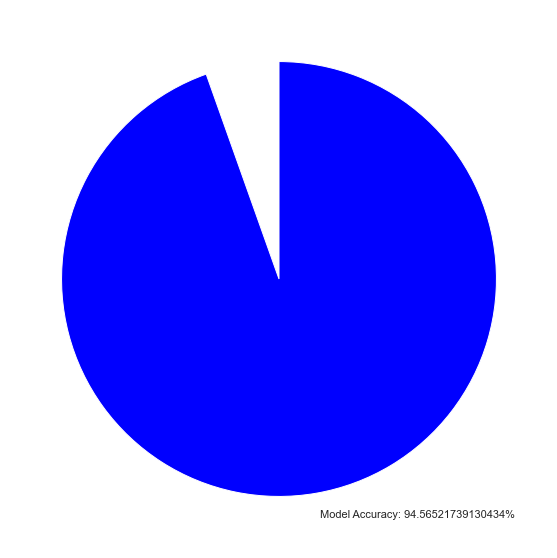

In [41]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt 
lr=classifier_rf.oob_score_*100
nacc=100-lr
y = np.array([nacc,lr])

mylabels = ['',"Model Accuracy: "+str(lr)+"%"]
mycolors = ["white","blue"]
plt.pie(y, labels = mylabels, startangle = 90,colors = mycolors)
accuracy =plt.show() 

In [42]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [43]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=1)

In [44]:
grid_search.best_score_

0.9847826086956523

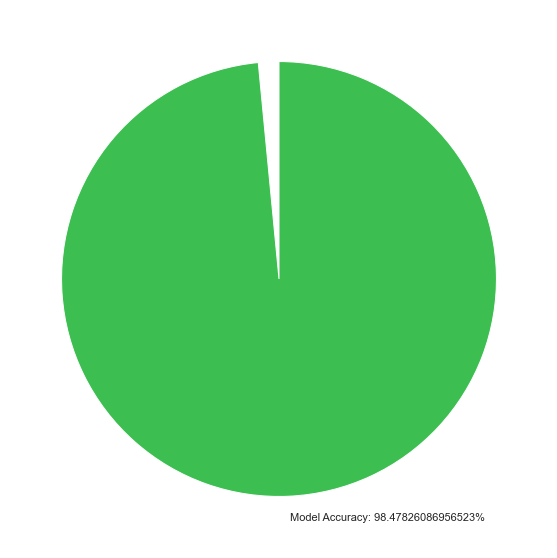

In [45]:
from sklearn.metrics import accuracy_score
lr=grid_search.best_score_*100
nacc=100-lr
y = np.array([nacc,lr])

mylabels = ['',"Model Accuracy: "+str(lr)+"%"]
mycolors = ["white","#3CbF50"]

plt.pie(y, labels = mylabels, startangle = 90,colors = mycolors)
accuracy =plt.show() 

In [46]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=8, n_estimators=200, n_jobs=-1,
                       random_state=42)

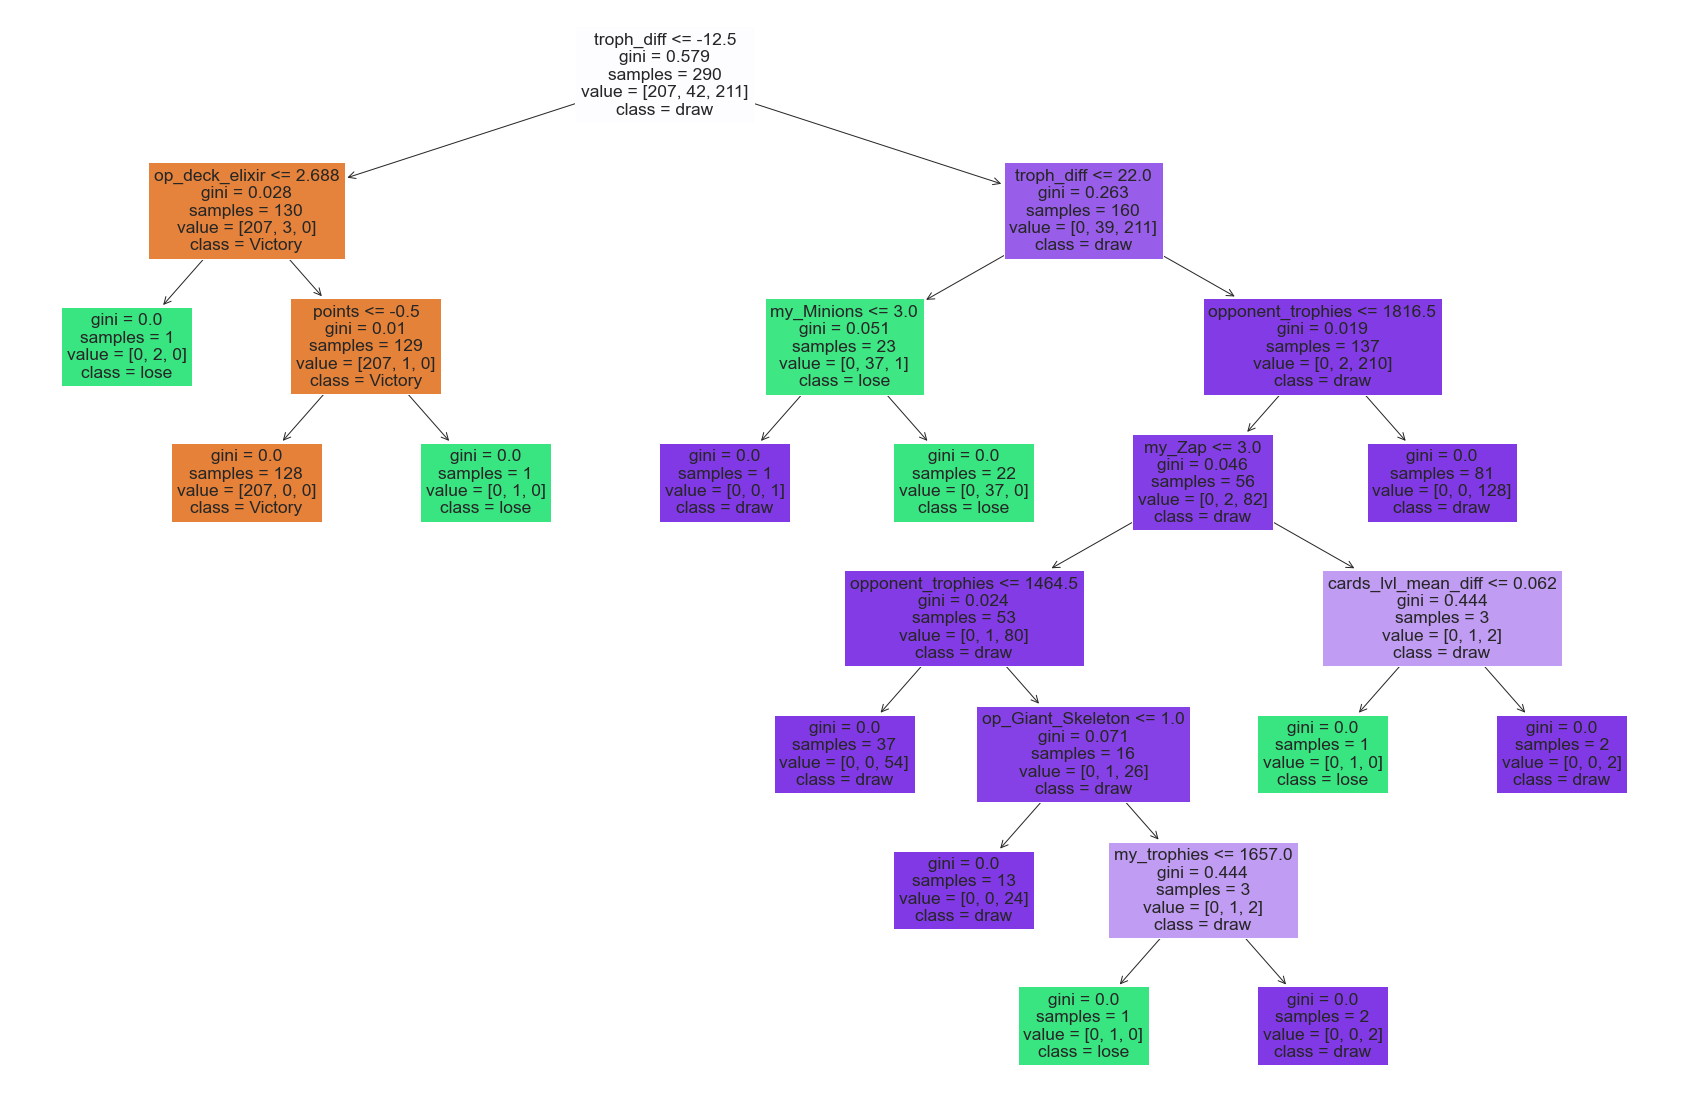

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,20))
plot_tree(rf_best.estimators_[5],feature_names = df.columns,class_names=['Victory', "lose",'draw'],filled=True);

In [48]:
import numpy as np
imp_df = pd.DataFrame({
    "Varname": df.columns,
    "Imp": rf_best.feature_importances_
})

In [49]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
137,troph_diff,0.287149
1,points,0.270033
2,opponent_score,0.114545
0,my_score,0.083677
4,opponent_trophies,0.018104
...,...,...
43,op_Ice_Golem,0.000000
115,my_Fire_Spirits,0.000000
126,my_Elite_Barbarians,0.000000
111,my_Wizard,0.000000
